# Задание 1. Моделирование случайных величин

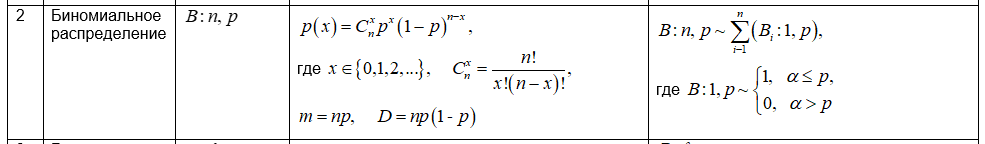

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#генерация по Бернулли
def generate_bernoulli(n, p): 
    x=np.random.rand(n, 1)
    x=x<=p
    x=x.astype(int)
    return x

In [3]:
n=500 #число величин, которое мы будем генерировать; если ставить больше, то при вычислении выборочной дисперсии комп зависает :(
alpha=0.2 #шанс получить единицу
values=generate_bernoulli(n, alpha) #генерируем

In [4]:
#вспомогательная функция вычисления биномиального коэффициента
def binomial_coefficient(n, x):
    return math.factorial(n)/(math.factorial(x)*math.factorial(n-x))

In [5]:
#вычисление вероятности
def calculating_probability(n, x, p):
    return binomial_coefficient(n, x)*(p**x)*((1-p)**(n-x))

In [6]:
p=calculating_probability(n, np.count_nonzero(values), alpha)

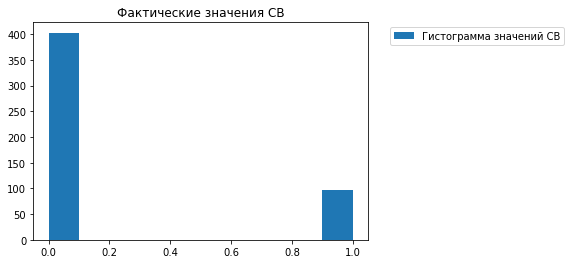

In [7]:
plt.hist(values, label = 'Гистограмма значений СВ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Фактические значения СВ')
plt.show()

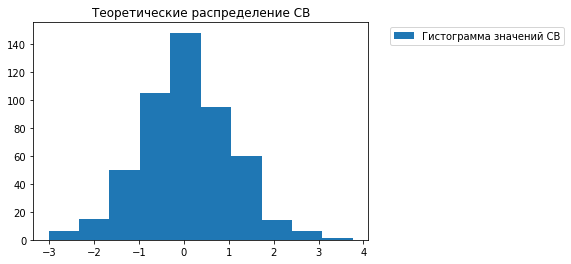

In [8]:
tmp=np.random.randn(n, 1)
plt.hist(tmp, label = 'Гистограмма значений СВ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Теоретические распределение СВ')
plt.show()

In [9]:
N=list(range(1,n+1))
m=n*p
d=n*p*(1-p)

In [10]:
# вычисление выборочного среднего
def sample_mean(x):
    if type(x) == list:
        n = len(x)
    else:
        n = x.shape[0]
    X = np.vstack([x]*n)
    X_ = np.tril(X)
    ms = X_.sum()/ N 
    return ms

In [11]:
ms = sample_mean(values) #выборочное среднее

In [12]:
def plot_mean(m,ms):
    N = list(range(1,len(ms)+1))
    plt.plot(N,ms,'r',label = 'Выборочное среднее')
    plt.axhline(m,color = 'g', label = 'Матожидание')
    plt.xlabel('Число реализаций СВ')
    plt.ylabel('Значения выборочного среднего')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

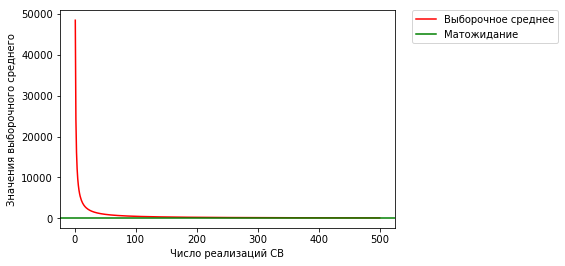

In [13]:
plot_mean(m,ms)

In [14]:
# вычисление выборочной дисперсии
def sample_variance(x):
    if type(x) == list:
        n = len(x)
    else:
        n = x.shape[0]
    X = np.vstack([x]*n)
    vd = np.tril(np.square(X - ms)).sum()/N
    return vd

In [15]:
vd = sample_variance(values)

In [16]:
def plot_variance(d,vd):
    N = list(range(1,len(vd)+1))
    plt.plot(N,vd,'r',label = 'Выборочная дисперсия')
    plt.axhline(d,color = 'g', label = 'Дисперсия')
    plt.xlabel('Число реализаций СВ')
    plt.ylabel('Значения выборочной дисперсии')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

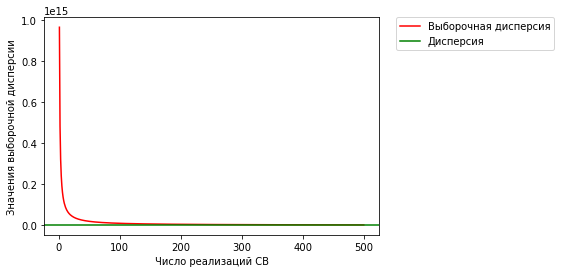

In [17]:
plot_variance(d, vd)